In [14]:
# read the csv
import pandas as pd
import matplotlib.pyplot as plt
from dataclean import clean_data as dc

In [15]:
fname = "data/DATA12.CSV"
dc(fname)

data = pd.read_csv(fname)

Error: Incorrect number of entries in the line: 155388,-1.973,1.35155399,-2.050,1.442,0.304,-0.069,0.148,0.022,0.045,0.075,0.090,0.000,0.000,0.974,-0.000,0.000,0.990,0.046,0.073,0.090,120,120,43,120,42,1.338,1.000,0.000,1.000,0.000
Expected: 29 Got: 31
Error: Incorrect number of entries in the line: 156939,-1.284,0.511,0.221,-0.033,0.039,0.151,0.110,0.131,0.196,0.000,0.000,1.071,-0.000,0.000,1.087,0.110,0.131,0.195,--119,11156950,-1.496,0.660,0.064,-0.032,0.043,0.149,0.110,0.131,0.198,0.000,0.000,1.071,-0.000,0.000,1.087,0.110,0.131,0.196,--119,119,108,119,111,1.414,1.000,0.000,1.000,0.000
Expected: 29 Got: 49
Error: Incorrect number of entries in the line: 157313,-1.229,0.852,0.028,-0.025,0.060,0.127,0.10157324,-1.001,0.764,0.138,-0.021,0.062,0.127,0.101,0.151,0.247,0.000,0.000,1.087,-0.000,0.000,1.103,0.101,0.151,0.245,--119,119,123,119,125,1.448,1.000,0.000,1.000,0.000
Expected: 29 Got: 36
Error: Incorrect number of entries in the line: 164419,-1.453,0.178,0.164,-0.048,-0164430,-1.4

In [16]:
data

,Time,Accel X [mg],Accel Y [mg],Accel Z [mg],dRoll [rad/s],dPitch [rad/s],dHeading [rad/s],Roll [rad],Pitch [rad],Yaw [rad],...,Motor A,Motor B,Motor C,Motor D,Motor E,Servo Angle [rad],Waypoint X [m],Waypoint Y [m],Waypoint Z [m],Waiting [bool]
0,154332,-2.613,0.755,0.470,1.720,0.282,1.597,0.017,0.003,0.016,...,0,0,85,0,85,1.275,0.0,0.0,1.0,1.0
1,154343,-2.621,0.758,0.497,5.158,1.461,5.093,0.069,0.017,0.067,...,0,0,85,0,85,1.286,0.0,0.0,1.0,1.0
2,154354,-2.538,0.891,0.377,0.440,-0.042,0.239,0.073,0.017,0.069,...,0,0,85,0,85,1.322,0.0,0.0,1.0,1.0
3,154365,-2.481,0.667,0.622,0.011,-0.065,-0.017,0.073,0.016,0.069,...,0,0,70,0,70,1.324,0.0,0.0,1.0,1.0
4,154376,-2.773,0.868,0.413,0.023,-0.029,0.026,0.074,0.016,0.069,...,0,0,85,0,85,1.324,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7043,232491,-1.569,1.305,0.311,0.072,-0.044,0.066,-0.228,0.406,-1.769,...,-----129,129,196,129,191,0.725,1.0,0.0,1.0,0.0
7044,232502,-1.685,1.277,0.195,0.069,-0.031,0.067,-0.228,0.405,-1.768,...,-----128,128,196,128,191,0.725,1.0,0.0,1.0,0.0
7045,232513,-1.616,1.222,0.287,0.071,-0.044,0.065,-0.227,0.405,-1.768,...,-----126,126,182,126,177,0.725,1.0,0.0,1.0,0.0
7046,232524,-1.667,1.305,0.285,0.068,-0.035,0.066,-0.226,0.405,-1.767,...,-----125,125,182,125,177,0.725,1.0,0.0,1.0,0.0


In [17]:
# Subtract the time of the first measurement
data['Time'] = (data['Time'] - data['Time'][0])/1000

In [13]:
data.columns

Index(['Time', ' Accel X [mg]', 'Accel Y [mg]', 'Accel Z [mg]',
       'dRoll [rad/s]', 'dPitch [rad/s]', 'dHeading [rad/s]', 'Roll [rad]',
       'Pitch [rad]', 'Yaw [rad]', 'Frequency Reader Frequency [Hz]',
       'Calibrated Velocity [m/s]'],
      dtype='object')

In [6]:
data['Time'] / data['Time'].max()

0         0.000000
1         0.000004
2         0.000008
3         0.000012
4         0.000017
            ...   
241795    0.999983
241796    0.999988
241797    0.999992
241798    0.999996
241799    1.000000
Name: Time, Length: 241800, dtype: float64

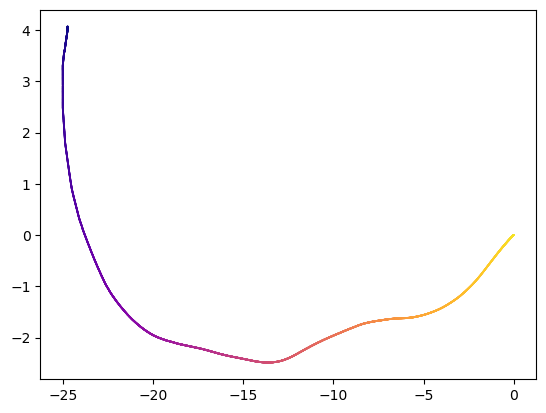

In [18]:
colormap = plt.colormaps.get_cmap('plasma_r')
color = colormap(data['Time'] / data['Time'].max())

plt.scatter(data['State Estimator X [m]'], data['State Estimator Y [m]'], c=color, s=0.1)

<Axes: xlabel='Time'>

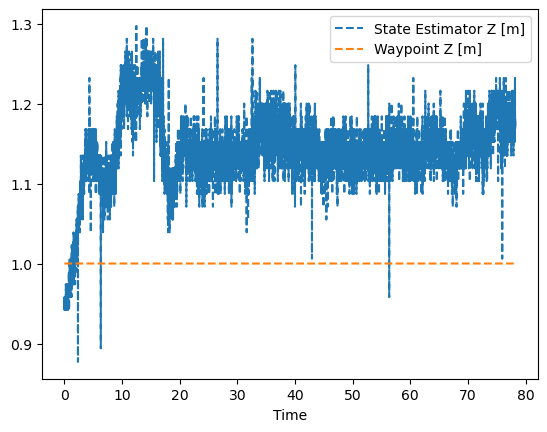

In [19]:
data.plot(x='Time', y=['State Estimator Z [m]', 'Waypoint Z [m]'], style='--')

<Axes: xlabel='Time'>

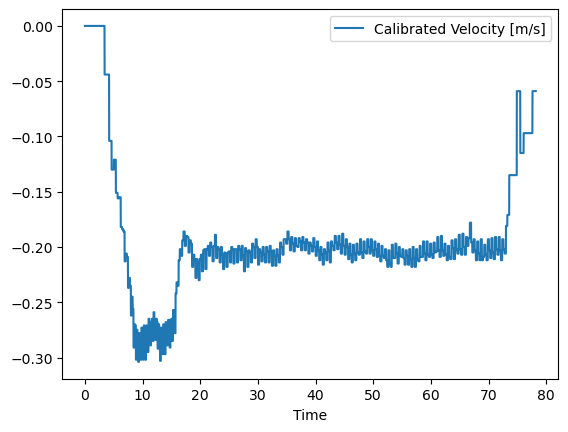

In [20]:
data.plot(x='Time', y='Calibrated Velocity [m/s]')
# data.plot(x='Time', y='State Estimator Yaw [rad]')

<Axes: xlabel='Time'>

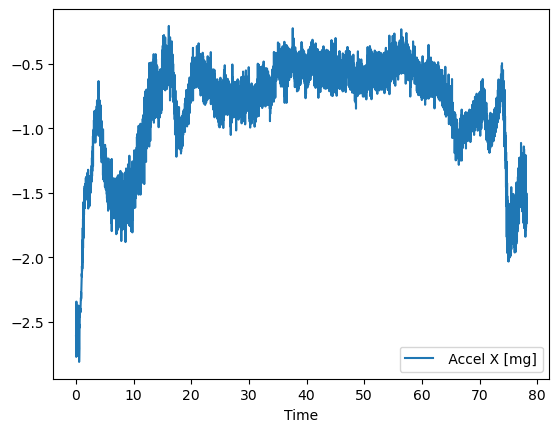

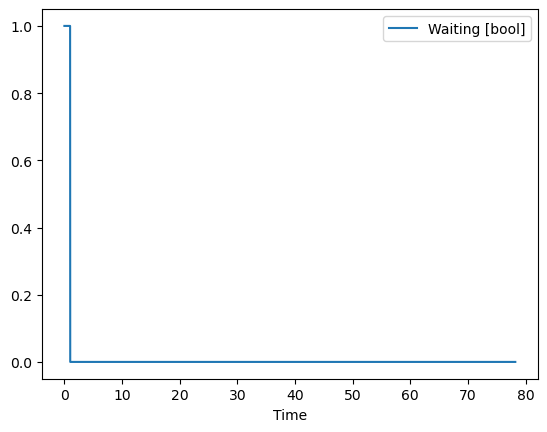

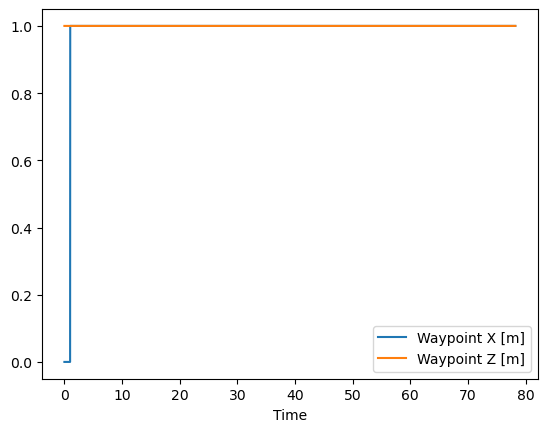

In [21]:
data.plot(x='Time', y=[' Accel X [mg]'], style='-')
data.plot(x='Time', y=['Waiting [bool]'], style='-')
data.plot(x='Time', y=['Waypoint X [m]', 'Waypoint Z [m]'])

In [8]:
data.columns

Index(['Time', ' Accel X [mg]', 'Accel Y [mg]', 'Accel Z [mg]',
       'dRoll [deg/s]', 'dPitch [deg/s]', 'dHeading [deg/s]', 'Roll [deg]',
       'Pitch [deg]', 'Yaw [deg]', 'Frequency Reader Frequency [Hz]',
       ' Calibrated Velocity [m/s]', 'Pressure Sensor Depth [m]',
       'State Estimator X [m]', 'State Estimator Y [m]',
       'State Estimator Z [m]', 'State Estimator Roll [rad]',
       'State Estimator Pitch [rad]', 'State Estimator Yaw [rad]', 'Motor A',
       ' Motor B', ' Motor C', ' Motor D', ' Motor E', 'Servo Angle [rad]',
       'Waypoint X [m]', ' Waypoint Y [m]', ' Waypoint Z [m]',
       ' Waiting [bool]'],
      dtype='object')

<Axes: xlabel='Time'>

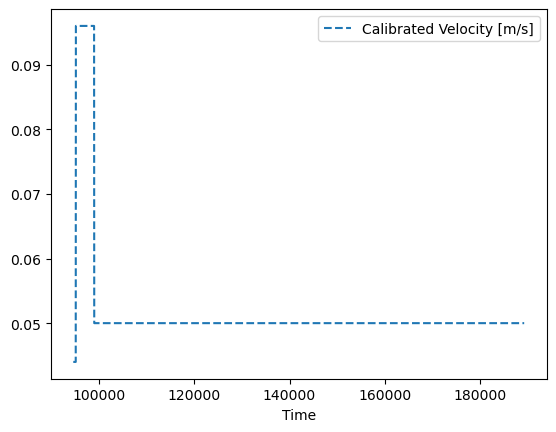

In [10]:
data.plot(x='Time', y=['Calibrated Velocity [m/s]'], style='--')

<Axes: xlabel='Time'>

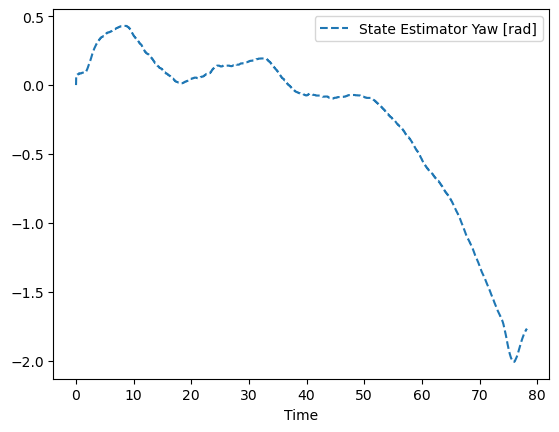

In [22]:
data.plot(x='Time', y=['State Estimator Yaw [rad]'], style='--')

In [23]:
len(data)

8600